# Netflix Titles - Exploratory Data Analysis

## Author: Pedro Malandrin Klesse

## Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

## Reading dataset

In [3]:
nf_titles = pd.read_csv('netflix_titles.csv')

## Step 1: Data Understanding

- Dataframe `shape`
- `head` and `tail`
- `dtypes`
- `describe`

In [5]:
nf_titles.shape

(8807, 12)

In [7]:
nf_titles.head(5)

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [8]:
nf_titles.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [16]:
nf_titles.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [44]:
nf_titles.describe()

show-id  release-year
count  8807.000000   8807.000000
mean   4404.000000   2014.180198
std    2542.506244      8.819312
min       1.000000   1925.000000
25%    2202.500000   2013.000000
50%    4404.000000   2017.000000
75%    6605.500000   2019.000000
max    8807.000000   2021.000000

## Step 2: Data Preparation

- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaning columns
- Feature creation

In [4]:
def id_to_numeric(data):
    return int(str(data).replace('s',''))


nf_titles['show_id'] = nf_titles['show_id'].apply(id_to_numeric)
nf_titles['show_id'].head(5)

0    1
1    2
2    3
3    4
4    5
Name: show_id, dtype: int64

In [5]:
nf_titles = nf_titles.rename(columns={'show_id':'show-id', 'date_added':'date-added', 'release_year':'release-year'}).copy()
nf_titles.columns

Index(['show-id', 'type', 'title', 'director', 'cast', 'country', 'date-added',
       'release-year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
nf_titles.loc[nf_titles.duplicated]

Empty DataFrame
Columns: [show-id, type, title, director, cast, country, date-added, release-year, rating, duration, listed_in, description]
Index: []

In [7]:
nf_titles.isna().sum()

show-id            0
type               0
title              0
director        2634
cast             825
country          831
date-added        10
release-year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
nf_titles.loc[nf_titles.duplicated(subset= ['duration','title'])]

Empty DataFrame
Columns: [show-id, type, title, director, cast, country, date-added, release-year, rating, duration, listed_in, description]
Index: []

## Step 3: Feature understanding
(Univariate Analysis)
- Plotting Feature Distributions
    - Histogram
    - KDE
    - Boxplot

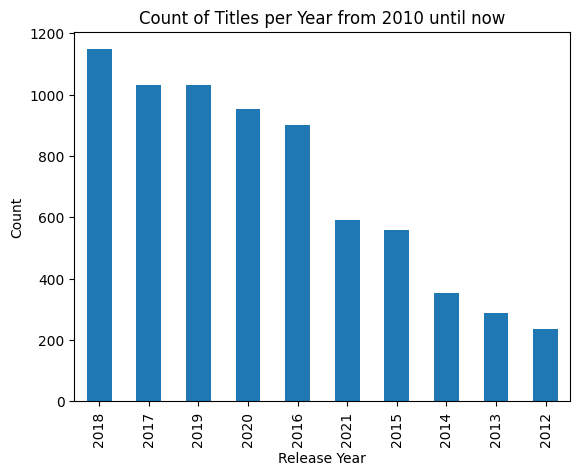

In [46]:
ax = nf_titles[nf_titles['release-year'] >2010]['release-year'] \
.value_counts() \
.head(10) \
.plot(kind='bar', title='Count of Titles per Year from 2010 until now')

ax.set_xlabel('Release Year')
ax.set_ylabel('Count')

plt.show()

Apparently from 2012 to 2018 the number of titles in netflix has increased. But From 2019 and beyond it decreased, maybe because of the pandemic in 2020 (from 2020 to 2021 we can see a significant decrease in titles count).

## Step 4: Feature Relantionships

- Scatterplot
- Heatmap correlation
- Pairplot
- Groupby comparisons

In [9]:
nf_titles.select_dtypes(include='int').dropna().corr()

show-id  release-year
show-id       1.000000     -0.246713
release-year -0.246713      1.000000

This dataset does not have much numerical columns, so it is hard to identify numerical correlation between it's attributes

## Step 5: Asking Questions

1) For 'House of Cards', what is the Show Id and Who is the Director of this show ?

2) In which year the highest number of the TV Shows & Movies were released ? Show with Bar Graph.

3) How many Movies & TV Shows are in the dataset ? Show with Bar Graph.

4) Show all the Movies that were released in year 2000.

5) Show only the Titles of all TV Shows that were released in India only.

6) Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?

7) Show all the Records, where "Type is Movie" or "Country is United Kingdom".

8) In how many movies/shows, Tom Cruise was cast ?

9) What are the different Ratings defined by Netflix ?

10) How many Movies got the 'TV-14' rating, in Canada ?

11) How many TV Shows got the 'R' rating, after year 2018 ?

12) What is the maximum duration of a Movie/Show on Netflix ?

13) Which individual country has the Highest No. of TV Shows ?

14) How can we sort the dataset by Year ?

In [56]:
nf_titles.columns

Index(['show-id', 'type', 'title', 'director', 'cast', 'country', 'date-added',
       'release-year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [61]:
# Question 1 : For 'House of Cards', what is the Show Id and Who is the Director of this show ?
pd.DataFrame({'id':nf_titles.query('title == "House of Cards"')['show-id'], 'director':nf_titles.query('title == "House of Cards"')['director']})

id director
1059  1060      NaN

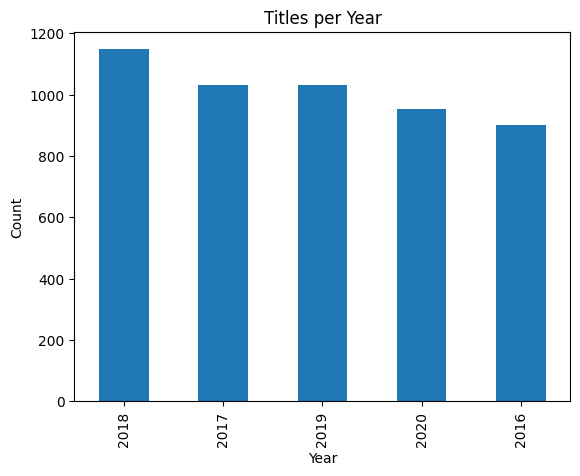

In [73]:
# Question 2 - In which year the highest number of the TV Shows & Movies were released ? Show with Bar Graph.

ax = nf_titles.groupby('release-year')['show-id'].count().sort_values(ascending=False).head().plot(kind='bar', 
                                                                                                   title='Titles per Year')

ax.set_xlabel('Year')
ax.set_ylabel('Count')

plt.show()

# Answer - 2018

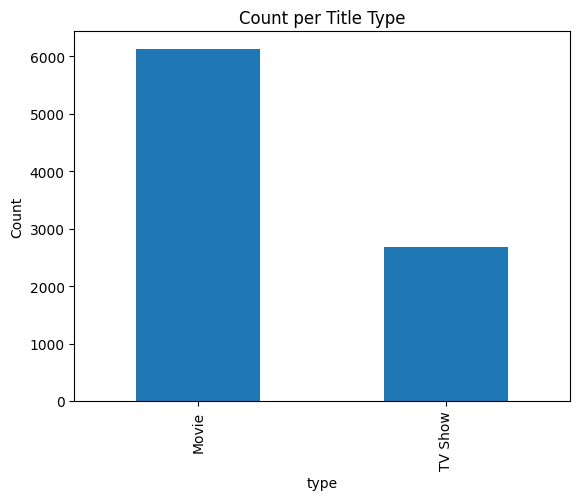

In [82]:
# Question 3 - How many Movies & TV Shows are in the dataset ? Show with Bar Graph.

ax = nf_titles.groupby('type')['show-id'].count().plot(kind='bar', 
                                                 title='Count per Title Type')

ax.set_ylabel('Count')
plt.show()

In [94]:
# Question 4 - Show all the Movies that were released in year 2000.

nf_titles[(nf_titles['type']=='Movie') & (nf_titles['release-year']==2000)]

show-id   type                                              title  \
180       181  Movie                 The Nutty Professor II: The Klumps   
350       351  Movie                                      Space Cowboys   
359       360  Movie                       The Original Kings of Comedy   
566       567  Movie                                   Charlie's Angels   
593       594  Movie                                           Snow Day   
779       780  Movie                                  Battlefield Earth   
952       953  Movie                               The Whole Nine Yards   
3472     3473  Movie                        Rugrats in Paris: The Movie   
4545     4546  Movie             Monty Python: Before the Flying Circus   
4723     4724  Movie                                               Fiza   
4956     4957  Movie                        Phir Bhi Dil Hai Hindustani   
5953     5954  Movie                             Joseph: King of Dreams   
6006     6007  Movie                                            28 Days   
6147     6148  Movie                                    American Psycho   
6154     6155  Movie  An American Tail: The Treasures of Manhattan I...   
6311     6312  Movie                                       Billy Elliot   
6437     6438  Movie                                       Center Stage   
6440     6441  Movie                                     Chal Mere Bhai   
6543     6544  Movie                     Crouching Tiger, Hidden Dragon   
6643     6644  Movie                       Dragonheart: A New Beginning   
6753     6754  Movie                                  Final Destination   
6912     6913  Movie                          Hamara Dil Aapke Paas Hai   
7013     7014  Movie                     How the Grinch Stole Christmas   
7247     7248  Movie                                          Kya Kehna   
7316     7317  Movie                                       Little Nicky   
7702     7703  Movie                                     Papa the Great   
7801     7802  Movie                                              Pukar   
7955     7956  Movie                                        Scary Movie   
7962     7963  Movie                                           Scream 3   
8196     8197  Movie                                     The Art of War   
8305     8306  Movie                 The Flintstones in Viva Rock Vegas   
8722     8723  Movie                                  What Lies Beneath   
8729     8730  Movie                                 Where the Money Is   

                           director  \
180                     Peter Segal   
350                  Clint Eastwood   
359                       Spike Lee   
566                             McG   
593                      Chris Koch   
779                 Roger Christian   
952                   Jonathan Lynn   
3472   Stig Bergqvist, Paul Demeyer   
4545                      Will Yapp   
4723                 Khalid Mohamed   
4956                     Aziz Mirza   
5953  Rob LaDuca, Robert C. Ramirez   
6006                   Betty Thomas   
6147                    Mary Harron   
6154                   Larry Latham   
6311                 Stephen Daldry   
6437                Nicholas Hytner   
6440                   David Dhawan   
6543                        Ang Lee   
6643                    Doug Lefler   
6753                     James Wong   
6912                 Satish Kaushik   
7013                     Ron Howard   
7247                    Kundan Shah   
7316                    Steve Brill   
7702                      Bhagyaraj   
7801              Rajkumar Santoshi   
7955            Keenen Ivory Wayans   
7962                     Wes Craven   
8196               Christian Duguay   
8305                   Brian Levant   
8722                Robert Zemeckis   
8729                Marek Kanievska   

                                                   cast  \
180   Eddie Murphy, Janet Jackson, Larry Miller, Joh...   
350   Clin

In [96]:
# Question 5 - Show only the Titles of all TV Shows that were released in India only.

nf_titles[(nf_titles['type'] == 'TV Show') & (nf_titles['country'] == 'India')]

show-id     type                               title director  \
4           5  TV Show                        Kota Factory      NaN   
39         40  TV Show                        Chhota Bheem      NaN   
50         51  TV Show                       Dharmakshetra      NaN   
66         67  TV Show       Raja Rasoi Aur Anya Kahaniyan      NaN   
69         70  TV Show      Stories by Rabindranath Tagore      NaN   
...       ...      ...                                 ...      ...   
8173     8174  TV Show                           Thackeray      NaN   
8235     8236  TV Show                         The Calling    Bumpy   
8321     8322  TV Show  The Golden Years with Javed Akhtar      NaN   
8349     8350  TV Show              The House That Made Me      NaN   
8775     8776  TV Show                     Yeh Meri Family      NaN   

                                                   cast country  \
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...   India   
39    Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...   India   
50    Kashmira Irani, Chandan Anand, Dinesh Mehta, A...   India   
66                                                  NaN   India   
69                                                  NaN   India   
...                                                 ...     ...   
8173                                                NaN   India   
8235                                                NaN   India   
8321                                                NaN   India   
8349                                       Vinay Pathak   India   
8775  Vishesh Bansal, Mona Singh, Akarsh Khurana, Ah...   India   

              date-added  release-year rating   duration  \
4     September 24, 2021          2021  TV-MA  2 Seasons   
39    September 16, 2021          2021  TV-Y7  3 Seasons   
50    September 15, 2021          2014  TV-PG   1 Season   
66    September 15, 2021          2014   TV-G   1 Season   
69    September 15, 2021          2015  TV-PG   1 Season   
...                  ...           ...    ...        ...   
8173        May 25, 2019          2019  TV-MA   1 Season   
8235       April 1, 2019          2018  TV-MA   1 Season   
8321        June 1, 2017          2016   TV-G   1 Season   
8349      March 31, 2017          2015  TV-PG  3 Seasons   
8775     August 31, 2018          2018  TV-PG   1 Season   

                                              listed_in  \
4     International TV Shows, Romantic TV Shows, TV ...   
39                                             Kids' TV   
50    International TV Shows, TV Dramas, TV Sci-Fi &...   
66                   Docuseries, International TV Shows   
69                    International TV Shows, TV Dramas   
...                                                 ...   
8173                                           TV Shows   
8235                 International TV Shows, Reality TV   
8321                 Docuseries, International TV Shows   
8349                 International TV Shows, Reality TV   
8775                International TV Shows, TV Comedies   

                                            description  
4     In a city of coaching centers known to train I...  
39    A brave, energetic little boy with superhuman ...  
50    After the ancient Great War, the god Chitragup...  
66    Explore the history and flavors of regional In...  
69    The writings of Nobel Prize winner Rabindranat...  
...                                                 ...  
8173  From controversial cartoonist to powerful Mumb...  
8235  Food-crazed travel junkies journey across Indi...  
8321  Writer, poet and lyricist Javed Akhtar hosts t...  
8349  With host Vinay Pathak, Indian celebrities ret...  
8775  In the summer of 1998, middle child Harshu bal...  

[79 rows x 12 columns]

In [12]:
# 6) Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix.

nf_titles.groupby('director')['show-id'].count().sort_values(ascending=False).head(10)

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          11
Name: show-id, dtype: int64

In [16]:
nf_titles.columns

Index(['show-id', 'type', 'title', 'director', 'cast', 'country', 'date-added',
       'release-year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [17]:
# 7) Show all the Records, where "Type is Movie" or "Country is United Kingdom".

nf_titles[((nf_titles['type']=='Movie')) | (nf_titles['country'] == 'United Kingdom')]

show-id     type                             title  \
0           1    Movie              Dick Johnson Is Dead   
6           7    Movie  My Little Pony: A New Generation   
7           8    Movie                           Sankofa   
8           9  TV Show     The Great British Baking Show   
9          10    Movie                      The Starling   
...       ...      ...                               ...   
8801     8802    Movie                           Zinzana   
8802     8803    Movie                            Zodiac   
8804     8805    Movie                        Zombieland   
8805     8806    Movie                              Zoom   
8806     8807    Movie                            Zubaan   

                           director  \
0                   Kirsten Johnson   
6     Robert Cullen, José Luis Ucha   
7                      Haile Gerima   
8                   Andy Devonshire   
9                    Theodore Melfi   
...                             ...   
8801                Majid Al Ansari   
8802                  David Fincher   
8804                Ruben Fleischer   
8805                   Peter Hewitt   
8806                    Mozez Singh   

                                                   cast  \
0                                                   NaN   
6     Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
7     Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
8     Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
9     Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
...                                                 ...   
8801  Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   

                                                country          date-added  \
0                                         United States  September 25, 2021   
6                                                   NaN  September 24, 2021   
7     United States, Ghana, Burkina Faso, United Kin...  September 24, 2021   
8                                        United Kingdom  September 24, 2021   
9                                         United States  September 24, 2021   
...                                                 ...                 ...   
8801                       United Arab Emirates, Jordan       March 9, 2016   
8802                                      United States   November 20, 2019   
8804                                      United States    November 1, 2019   
8805                                      United States    January 11, 2020   
8806                                              India       March 2, 2019   

      release-year rating   duration  \
0             2020  PG-13     90 min   
6             2021     PG     91 min   
7             1993  TV-MA    125 min   
8             2021  TV-14  9 Seasons   
9             2021  PG-13    104 min   
...            ...    ...        ...   
8801          2015  TV-MA     96 min   
8802          2007      R    158 min   
8804          2009      R     88 min   
8805          2006     PG     88 min   
8806          2015  TV-14    111 min   

                                             listed_in  \
0                                        Documentaries   
6                             Children & Family Movies   
7     Dramas, Independent Movies, International Movies   
8                         British TV Shows, Reality TV   
9                                     Comedies, Dramas   
...                                                ...   
8801           Dramas, International Movies, Thrillers   
8802                    Cult Movies, Dramas, Thrillers   
8804                           Comedies, Horror Movies   
8805                Children & Family Movies, Comedies   
8806    Dramas, International Movies, M

In [34]:
# 8) In how many movies/shows, Tom Cruise was cast ?

nf_titles['cast'].apply(lambda x: 'Tom Cruise' in str(x)).value_counts().iloc[1]

2

In [39]:
# 9) What are the different Ratings defined by Netflix ?

nf_titles['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [41]:
# 10) How many Movies got the 'TV-14' rating, in Canada ?

nf_titles[(nf_titles['rating'] == 'TV-14') & (nf_titles['country'] == 'Canada')]['show-id'].count()

26

In [44]:
# 11) How many TV Shows got the 'R' rating, after year 2018 ?

nf_titles[(nf_titles['rating'] == 'R') & (nf_titles['release-year'] > 2018)]['show-id'].count()

108

In [67]:
# 12) What is the maximum duration of a Movie/Show on Netflix ?

result = nf_titles['duration'].dropna().apply(lambda x: int(str(x).split(' ')[0]) if "Seasons" in str(x) else 0).max()

print(f"{result} seasons")

17 seasons


In [74]:
# 13) Which individual country has the Highest No. of TV Shows ?

nf_titles[nf_titles['type'] == 'TV Show'].groupby('country')['show-id'].count().sort_values(ascending=False).head(1)

country
United States    760
Name: show-id, dtype: int64

In [77]:
# 14) How can we sort the dataset by Year ?

nf_titles.sort_values(by='release-year')

show-id     type                                          title  \
4250     4251  TV Show              Pioneers: First Women Filmmakers*   
7790     7791    Movie                                 Prelude to War   
8205     8206    Movie                           The Battle of Midway   
8660     8661    Movie  Undercover: How to Operate Behind Enemy Lines   
8739     8740    Movie             Why We Fight: The Battle of Russia   
...       ...      ...                                            ...   
862       863  TV Show                                        Special   
861       862    Movie             Little Singham Future mein Satakli   
857       858  TV Show                                   The Neighbor   
876       877  TV Show                                   Alma Matters   
965       966  TV Show                                         Yasuke   

                         director  \
4250                          NaN   
7790                  Frank Capra   
8205                    John Ford   
8660                    John Ford   
8739  Frank Capra, Anatole Litvak   
...                           ...   
862                           NaN   
861                 Prakash Satam   
857                           NaN   
876                           NaN   
965                           NaN   

                                                   cast        country  \
4250                                                NaN            NaN   
7790                                                NaN  United States   
8205                          Henry Fonda, Jane Darwell  United States   
8660                                                NaN  United States   
8739                                                NaN  United States   
...                                                 ...            ...   
862   Ryan O'Connell, Jessica Hecht, Punam Patel, Ma...  United States   
861   Anamaya Verma, Ganesh Divekar, Jigna Bharadhwa...            NaN   
857   Quim Gutiérrez, Clara Lago, Adrián Pino, Catel...          Spain   
876                                                 NaN          India   
965   LaKeith Stanfield, Takehiro Hira, Maya Tanida,...            NaN   

             date-added  release-year rating   duration  \
4250  December 30, 2018          1925  TV-14   1 Season   
7790     March 31, 2017          1942  TV-14     52 min   
8205     March 31, 2017          1942  TV-14     18 min   
8660     March 31, 2017          1943  TV-PG     61 min   
8739     March 31, 2017          1943  TV-PG     82 min   
...                 ...           ...    ...        ...   
862        May 20, 2021          2021  TV-MA  2 Seasons   
861        May 20, 2021          2021  TV-Y7     47 min   
857        May 21, 2021          2021  TV-MA  2 Seasons   
876        May 14, 2021          2021  TV-MA   1 Season   
965      April 29, 2021          2021  TV-MA   1 Season   

                                              listed_in  \
4250                                           TV Shows   
7790                      Classic Movies, Documentaries   
8205                      Classic Movies, Documentaries   
8660                      Classic Movies, Documentaries   
8739                                      Documentaries   
...                                                 ...   
862                                         TV Comedies   
861                  Children & Family Movies, Comedies   
857   International TV Shows, Spanish-Language TV Sh...   
876                  Docuseries, International TV Shows   
965                Anime Series, International TV Shows   

                                            description  
4250  This collection restores films from women who ...  
7790  Frank Capra's documentary chronicles the rise ...  
8205  Director John Ford captures combat footage of ...  
8660  This World War II-era training film dramatizes...  
8739  This installment of Frank Capra's acclaimed do...  
...                          